In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import csv
import numpy as np
import numpy as np

In [14]:
!python3 setup.py


{'time': 0.0, 'object_id': 0, 'x': 25217.424362950926, 'y': -496457.41386781185, 'z': 650671.2495281389, 'vx': 0.0014348032818816137, 'vy': -0.00088002800475806, 'vz': -0.0007270622299984097, 'size': 5.933089989621293}

In [15]:
x0 = np.array([25217.424362950926], dtype = np.float64)
y0 = np.array([-496457.41386781185], dtype = np.float64)
z0 = np.array([ 650671.2495281389], dtype = np.float64)

vx0 = np.array([0.0014348032818816137], dtype = np.float64)
vy0 = np.array([-0.00088002800475806], dtype = np.float64)
vz0 = np.array([-0.0007270622299984097], dtype = np.float64)

month = 10*3600*24*31
print(month)

26784000


In [16]:
from src.python_package.space_junk_simulator import space_simulator
sim = space_simulator(gpu = False)

/Users/ivan_kharitonov/Yandex.Disk.localized/Code/YSDA/YSDA_4_Semester/ML_in_Engineering/sources/space_junk_simulator
/Users/ivan_kharitonov/Yandex.Disk.localized/Code/YSDA/YSDA_4_Semester/ML_in_Engineering/sources/space_junk_simulator/src/python_package
Ok!


In [17]:
x0, y0, z0, vx0, vy0, vz0

(array([25217.42436295]),
 array([-496457.41386781]),
 array([650671.24952814]),
 array([0.0014348]),
 array([-0.00088003]),
 array([-0.00072706]))

In [20]:
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(10), timestep = float(1.0))

In [21]:
x_res, y_res, z_res, vx_res, vy_res, vz_res

(array([4.43826465e+13]),
 array([-3.53602795e+13]),
 array([-1.59506541e+13]),
 array([6.36324039e+12]),
 array([-1.07238778e+13]),
 array([5.54378353e+12]))

In [22]:
x0, y0, z0, vx0, vy0, vz0 = x_res, y_res, z_res, vx_res, vy_res, vz_res

100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


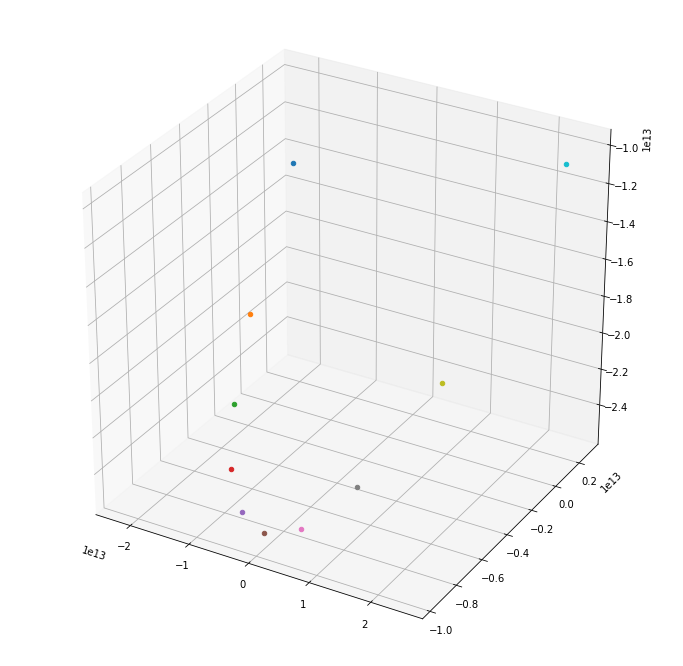

In [23]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

from tqdm import trange
simulation_steps = 10
time_step = 10000  # s
simulation_history = []

plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

# vx0, vy0, vz0 = 0,0,0
objects_steps = []
for simulation_step in trange(simulation_steps):

    x_res, y_res, z_res, vx_res, vy_res, vz_res = \
    sim.run(x0, y0, z0, vx0, vy0, vz0, x0.size,vzsteps= int(10000), timestep = float(1.0))


    x0, y0, z0, vx0, vy0, vz0 = x_res, y_res, z_res, vx_res, vy_res, vz_res
    ax.scatter3D( x_res, y_res, z_res)

simulation_history.append(objects_steps)

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

from tqdm import trange
simulation_steps = 10000
time_step = 0.01  # s
simulation_history = []

plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

# vx0, vy0, vz0 = 0,0,0
objects_steps = []
for simulation_step in trange(simulation_steps):

    x_res, y_res, z_res, vx_res, vy_res, vz_res = \
    sim.python_checker(x0, y0, z0, vx0, vy0, vz0, x0.size,vzsteps= int(10000), timestep = float(1.0))


    x0, y0, z0, vx0, vy0, vz0 = x_res, y_res, z_res, vx_res, vy_res, vz_res
    ax.scatter3D( x_res, y_res, z_res)

simulation_history.append(objects_steps)

In [ ]:
import vispy

In [ ]:
vispy.

In [22]:


import numpy as np
import sys

from vispy import app, visuals, scene


# build your visuals, that's all
Scatter3D = scene.visuals.create_visual_node(visuals.MarkersVisual)

# The real-things : plot using scene
# build canvas
canvas = scene.SceneCanvas(keys='interactive', show=True)

# Add a ViewBox to let the user zoom/rotate
view = canvas.central_widget.add_view()
view.camera = 'turntable'
view.camera.fov = 45
view.camera.distance = 500

# data
n = 500
pos = np.zeros((n, 3))
colors = np.ones((n, 4), dtype=np.float32)
radius, theta, dtheta = 1.0, 0.0, 10.5 / 180.0 * np.pi
for i in range(500):
    theta += dtheta
    x = 0.0 + radius * np.cos(theta)
    y = 0.0 + radius * np.sin(theta)
    z = 1.0 * radius
    r = 10.1 - i * 0.02
    radius -= 0.45
    pos[i] = x, y, z
    colors[i] = (i/500, 1.0-i/500, 0, 0.8)

# plot ! note the parent parameter
p1 = Scatter3D(parent=view.scene)
p1.set_gl_state('translucent', blend=True, depth_test=True)
p1.set_data(pos, face_color=colors, symbol='o', size=10,
            edge_width=0.5, edge_color='blue')

# run

# CPU

In [ ]:
from src.python_package.space_junk_simulator import space_simulator
sim = space_simulator(gpu = False)

In [ ]:

x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim.run(x0, y0, z0, vx0, vy0, vz0, vzsteps=month, timestep = 0.1)

In [ ]:
x_res, y_res, z_res, vx_res, vy_res, vz_res

# GPU

In [ ]:
!ls src/python_package/

In [ ]:
from src.python_package.space_junk_simulator import space_simulator
sim = space_simulator(gpu = True)

In [ ]:
!/usr/local/cuda/bin/nvcc -ccbin g++

In [ ]:
import ctypes
so_gpu_path = "/home/ipharitonov/space_junk_simulator/src/python_package/python_package_gpu.so"
solver_gpu = ctypes.CDLL(so_gpu_path)

In [ ]:
!nvcc -c space_junk_simulator/src/gpu/gpu_solver.cu -o space_junk_simulator/src/gpu/gpu_solver.o -Xcompiler -fPIC

In [ ]:
solver_gpu.solve_cpu

# Тест напрямую

In [ ]:
import os
import matplotlib.pyplot as plt
import subprocess
import json

In [ ]:
#run binary
FNULL = open(os.devnull, 'w')    #use this if you want to suppress output to stdout from the subprocess
args = "../bin/spacejunk_debug_cpu.exe ../source/cfg.txt output.txt"
subprocess.call(args, stdout=FNULL, stderr=FNULL, shell=False)

In [ ]:
#set cfg.txt
cfg = {
    "objects" : [
        {
            "x" : 0.0, 
            "y" : 7645200.0,
            "z" : 0.0,
            "vx" : 7220.0,
            "vy" : 0.0,
            "vz" : 0.0,
            "size" : 1.0
        }
    ],
    "time" : 0.0,
    "dt" : 1.0,
    "maxSteps" : 1000.0,
    "steps" : 1000,
    "logObjects" : (0)
}
with open("cfg.txt", "w") as f:
    f.write(json.dumps(cfg))

In [ ]:
!ls

In [ ]:
args = " cfg.txt output_2.txt"
subprocess.call(args, stdout=FNULL, stderr=FNULL, shell=False)

In [ ]:
with open("output_2.txt", "r") as res:
    l = res.read()
    print(l)